<a href="https://colab.research.google.com/github/adityavsarkar19/Player-Performance-Prediction-/blob/main/Performance_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding The Dataset


In [6]:
#Loading the Datasets

import numpy as np
import pandas as pd 

train = pd.read_csv("/content/train.csv") #dataset source: https://www.kaggle.com/datasets/arnabchaki/player-performance-assessment?select=test.csv
test = pd.read_csv("/content/test.csv")

In [7]:
train


,row_id,scout_id,rating_num,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,1,13,7.0,winner,team1,8,7.0,7.0,0.317073,0.48,...,0.193658,0.131548,0.097131,0.600944,0.338892,0.347980,0.034157,0.288962,0.310727,0.204925
1,3,16,6.5,loser,team2,8,3.0,9.0,0.463415,0.42,...,0.190500,0.173697,0.272801,0.605659,0.526761,0.468976,0.054034,0.334962,0.380073,0.295392
2,4,4,8.5,loser,team1,5,11.0,11.0,0.682927,0.44,...,0.312314,0.250756,0.212631,0.558833,0.686523,0.441749,0.219441,0.414288,0.570757,0.437500
3,5,13,8.0,loser,team2,4,17.0,17.0,0.682927,0.58,...,0.282556,0.155969,0.206503,0.533002,0.373959,0.527733,0.095201,0.423040,0.330754,0.235558
4,7,11,3.5,draw,team1,5,10.0,10.0,0.731707,0.70,...,0.450453,0.199050,0.134002,0.688773,0.681724,0.733625,0.128719,0.448360,0.444946,0.312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20448,29221,14,5.0,draw,team2,14,NaN,NaN,0.439024,0.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20449,29223,3,6.0,winner,team2,11,4.0,4.0,0.390244,0.32,...,0.362193,0.240326,0.369752,0.438649,0.381099,0.264074,0.171927,0.422975,0.588501,0.534694
20450,29224,4,5.0,loser,team1,7,5.0,5.0,0.268293,0.30,...,0.341322,0.248870,0.240096,0.515025,0.694587,0.869000,0.296820,0.511550,0.548315,0.385927
20451,29226,13,6.0,loser,team1,8,5.0,5.0,0.463415,0.46,...,0.215831,0.190395,0.207007,0.631279,0.330606,0.322158,0.108018,0.333229,0.349177,0.458685


In [ ]:
# Generate a correlation matrix.
train.corr()

#too many columns to evaluate 

,row_id,scout_id,rating_num,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_1,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
row_id,1.000000,0.017885,-0.167852,0.032443,0.003965,0.005554,-0.012078,-0.010551,-0.037521,0.001232,...,0.006372,-0.016581,-0.009663,0.010920,0.008544,-0.002126,-0.009874,-0.005428,-0.008082,0.026936
scout_id,0.017885,1.000000,0.013590,0.041903,-0.010558,-0.007104,-0.021856,-0.038816,0.003574,-0.003382,...,0.007296,0.007516,-0.001189,-0.024087,0.042262,0.013332,-0.003362,0.027326,0.033307,0.020558
rating_num,-0.167852,0.013590,1.000000,-0.068516,0.019457,0.022495,-0.014785,-0.053880,0.117848,-0.020071,...,0.022215,0.028937,0.019037,-0.017786,-0.023993,0.010867,0.025713,0.016586,0.033952,-0.011991
competitionId,0.032443,0.041903,-0.068516,1.000000,-0.002132,-0.007870,0.010574,-0.011889,0.027847,0.000404,...,0.022037,0.025652,0.048990,0.004663,0.033632,0.014912,0.000775,-0.019079,0.196055,-0.018709
player_position_1,0.003965,-0.010558,0.019457,-0.002132,1.000000,0.954262,-0.080985,-0.040299,0.130674,-0.030808,...,-0.010303,-0.000996,0.010647,-0.015540,-0.003472,0.001327,0.005485,0.014589,-0.011718,0.007915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
team2_defensive_derived_var_15,-0.002126,0.013332,0.010867,0.014912,0.001327,-0.004716,0.014221,0.018672,0.016705,-0.004716,...,0.071105,0.237930,-0.113489,0.157603,0.492222,1.000000,0.289166,0.312034,0.221454,-0.132890
team2_offensive_derived_var_16,-0.009874,-0.003362,0.025713,0.000775,0.005485,0.000884,-0.000046,0.014069,0.044370,0.005231,...,0.075035,0.741696,0.264865,-0.166565,0.332019,0.289166,1.000000,0.020408,0.175557,0.035632
team2_defensive_derived_var_17,-0.005428,0.027326,0.016586,-0.019079,0.014589,0.010171,0.018884,0.011171,-0.019371,-0.011628,...,-0.163826,0.051611,0.031969,-0.027016,0.161296,0.312034,0.020408,1.000000,0.076861,0.086896
team2_offensive_derived_var_18,-0.008082,0.033307,0.033952,0.196055,-0.011718,-0.013271,-0.006083,0.002757,0.026901,0.002473,...,-0.021379,0.369433,0.007530,-0.036860,0.585079,0.221454,0.175557,0.076861,1.000000,-0.208941


###Empty and Null Columns

In [28]:
nan_cols = [i for i in train.columns if train[i].isnull().all()]
nan_cols

['team1_other_raw_var_19',
 'team1_other_raw_var_31',
 'team1_other_raw_var_33',
 'team1_other_raw_var_38',
 'team1_other_raw_var_40',
 'team1_other_raw_var_43',
 'team1_other_raw_var_50',
 'team1_other_raw_var_51',
 'team1_other_raw_var_72',
 'team1_other_raw_var_82',
 'team1_other_raw_var_92',
 'team1_other_ratio_var_32',
 'team1_other_ratio_var_33',
 'team2_other_raw_var_19',
 'team2_other_raw_var_31',
 'team2_other_raw_var_33',
 'team2_other_raw_var_38',
 'team2_other_raw_var_40',
 'team2_other_raw_var_43',
 'team2_other_raw_var_50',
 'team2_other_raw_var_51',
 'team2_other_raw_var_72',
 'team2_other_raw_var_82',
 'team2_other_raw_var_92',
 'team2_other_ratio_var_32',
 'team2_other_ratio_var_33']

### Checking for Skewed Distribution using Box Plots

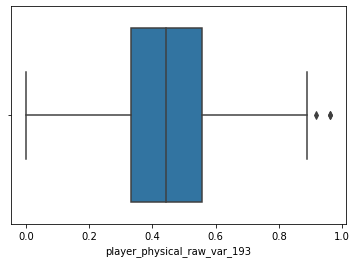

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='player_physical_raw_var_193', data=train)

#Raw variables have normal distribution generally


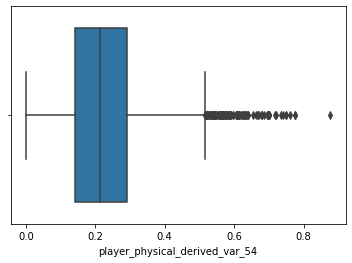

In [17]:
#derived and ratio columns have skewed distribution mostly
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='player_physical_derived_var_54', data=train)

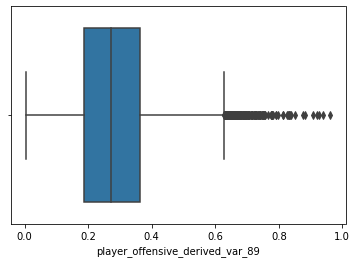

In [20]:
#derived and ratio columns have skewed distribution mostly
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='player_offensive_derived_var_89', data=train)

### Checking for Multimodal Distributions

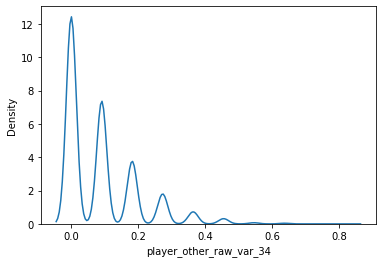

In [29]:
import seaborn as sns
sns.kdeplot(data=train, x="player_other_raw_var_34")

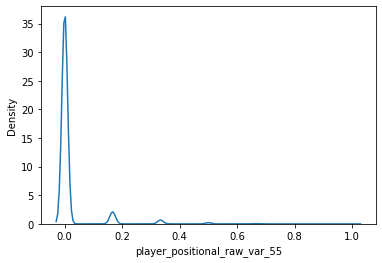

In [30]:
import seaborn as sns
sns.kdeplot(data=train, x="player_positional_raw_var_55")

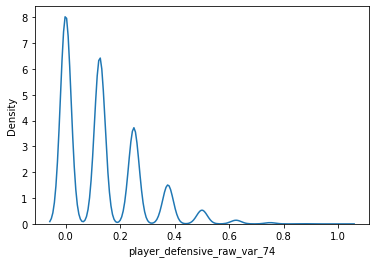

In [33]:
import seaborn as sns
sns.kdeplot(data=train, x="player_defensive_raw_var_74")

# Pre-Processing
### Some Observations after Analysis in R and Excel are as follows:
1. There are plenty of Null and Zero columns which need to be removed. 
2. 50 columns which have more than 80% Null Values and some of them even had 100% Null Values.
3. There are plenty of highly corelated columns which needs to be removed.
4. The train data is not uniformly distributed , there are columns with Skewed Distribution (especially the  Ratio and Derived Vars).
5. A lot of columns have multimodal distribution.



In [8]:
#Dropping "rating_num" from training set
x_train = train.drop(['rating_num'], axis = 1)
x_test = test.copy()

In [9]:
# Dropping the row_id
combo = pd.concat([x_train,x_test])
combo = combo.drop(['row_id'], axis = 1)
combo

,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_1,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,13,winner,team1,8.0,7.0,7.0,0.317073,0.48,0.0,0,...,0.193658,0.131548,0.097131,0.600944,0.338892,0.347980,0.034157,0.288962,0.310727,0.204925
1,16,loser,team2,8.0,3.0,9.0,0.463415,0.42,0.0,0,...,0.190500,0.173697,0.272801,0.605659,0.526761,0.468976,0.054034,0.334962,0.380073,0.295392
2,4,loser,team1,5.0,11.0,11.0,0.682927,0.44,0.0,0,...,0.312314,0.250756,0.212631,0.558833,0.686523,0.441749,0.219441,0.414288,0.570757,0.437500
3,13,loser,team2,4.0,17.0,17.0,0.682927,0.58,0.0,0,...,0.282556,0.155969,0.206503,0.533002,0.373959,0.527733,0.095201,0.423040,0.330754,0.235558
4,11,draw,team1,5.0,10.0,10.0,0.731707,0.70,0.0,0,...,0.450453,0.199050,0.134002,0.688773,0.681724,0.733625,0.128719,0.448360,0.444946,0.312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,15,draw,team1,4.0,1.0,1.0,0.634146,0.62,0.0,1,...,0.528911,0.213218,0.130847,0.760170,0.632988,0.712490,0.128725,0.467837,0.351842,0.425171
4038,18,loser,team2,11.0,1.0,1.0,0.634146,0.52,0.0,0,...,0.458684,0.199792,0.420061,0.425927,0.607429,0.663883,0.125744,0.450009,0.565407,0.294886
4039,3,draw,team1,4.0,5.0,5.0,0.463415,0.28,0.0,0,...,0.179808,0.179520,0.351994,0.543880,0.276438,0.306921,0.070733,0.411511,0.159210,0.565340
4040,2,winner,team2,9.0,13.0,13.0,0.195122,0.22,0.0,0,...,0.308125,0.279149,0.199474,0.615000,0.809645,0.862023,0.154983,0.466936,0.495329,0.299772


### Dropping 100% Null Columns

In [10]:
for column in combo.select_dtypes('float64').columns.to_list():
    if combo[column].isnull().sum()/len(combo) == 1:
        combo = combo.drop(column,axis=1)

### Replacing other Null Data Points with Mean 

In [ ]:
for column in combo.select_dtypes('float64').columns.to_list():
    if combo[column].isnull().sum() != 0:
        combo[column] = combo[column].fillna(combo[column].mean())

In [ ]:
# Replace winner,draw, loser with 1,0,-1 in winner column
# Replace team1 with 1 and team2 with zero in team column.

combo['team'] = np.where(combo['team']!= 'team1', 1, 0)
combo['winner'] = np.where(combo['winner']== 'winner', 1, np.where(combo['winner']== 'loser', -1,0 ))

###KDE PLOTS AND ANALYSIS TO CHECK WHAT COLUMNS ARE SKEWED
### USe Seaoborn KDE plots and df.skew()
### https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45

### Quantile Tranformations to Handle Skewed Distributions in the Dataset (give reason in paper)
### We are converting the skewed distribution to a normal distribution


In [ ]:
from sklearn.preprocessing import QuantileTransformer
list1 = [x for x in combo.columns.to_list() if x.startswith('player_general_var')] 
for column in list1:
    transform = QuantileTransformer(output_distribution = 'normal')
    combo[column] = transform.fit_transform(combo[column].values.reshape(-1,1)) 


In [ ]:
from sklearn.preprocessing import QuantileTransformer
list1 = [x for x in combo.columns.to_list() if x.startswith('player_general_derived_var')] 
for column in list1:
    transform = QuantileTransformer(output_distribution = 'normal')
    combo[column] = transform.fit_transform(combo[column].values.reshape(-1,1)) 


In [ ]:
from sklearn.preprocessing import QuantileTransformer
list1 = [x for x in combo.columns.to_list() if x.startswith('player_defensive_ratio_var')] 
for column in list1:
    transform = QuantileTransformer(output_distribution = 'normal')
    combo[column] = transform.fit_transform(combo[column].values.reshape(-1,1)) 


In [ ]:
from sklearn.preprocessing import QuantileTransformer
list1 = [x for x in combo.columns.to_list() if x.startswith('player_defensive_derived_var')] 
for column in list1:
    transform = QuantileTransformer(output_distribution = 'normal')
    combo[column] = transform.fit_transform(combo[column].values.reshape(-1,1)) 

In [ ]:
from sklearn.preprocessing import QuantileTransformer
list1 = [x for x in combo.columns.to_list() if x.startswith('player_offensive_derived_var')] 
for column in list1:
    transform = QuantileTransformer(output_distribution = 'normal')
    combo[column] = transform.fit_transform(combo[column].values.reshape(-1,1)) 

In [ ]:
from sklearn.preprocessing import QuantileTransformer
list1 = [x for x in combo.columns.to_list() if x.startswith('player_offensive_ratio_var')] 
for column in list1:
    transform = QuantileTransformer(output_distribution = 'normal')
    combo[column] = transform.fit_transform(combo[column].values.reshape(-1,1)) 

In [ ]:
from sklearn.preprocessing import QuantileTransformer
list1 = [x for x in combo.columns.to_list() if x.startswith('player_physical_derived_var')] 
for column in list1:
    transform = QuantileTransformer(output_distribution = 'normal')
    combo[column] = transform.fit_transform(combo[column].values.reshape(-1,1)) 

In [ ]:
from sklearn.preprocessing import QuantileTransformer
list1 = [x for x in combo.columns.to_list() if x.startswith('team1_offensive_ratio_var')] 
for column in list1:
    transform = QuantileTransformer(output_distribution = 'normal')
    combo[column] = transform.fit_transform(combo[column].values.reshape(-1,1)) 

In [ ]:
from sklearn.preprocessing import QuantileTransformer
list1 = [x for x in combo.columns.to_list() if x.startswith('team1_offensive_derived_var')] 
for column in list1:
    transform = QuantileTransformer(output_distribution = 'normal')
    combo[column] = transform.fit_transform(combo[column].values.reshape(-1,1)) 

In [ ]:
from sklearn.preprocessing import QuantileTransformer
list1 = [x for x in combo.columns.to_list() if x.startswith('team2_offensive_derived_var')] 
for column in list1:
    transform = QuantileTransformer(output_distribution = 'normal')
    combo[column] = transform.fit_transform(combo[column].values.reshape(-1,1)) 

In [ ]:
from sklearn.preprocessing import QuantileTransformer
list1 = [x for x in combo.columns.to_list() if x.startswith('team2_offensive_ratio_var')] 
for column in list1:
    transform = QuantileTransformer(output_distribution = 'normal')
    combo[column] = transform.fit_transform(combo[column].values.reshape(-1,1)) 

### Label Encoding the Multimodial Variables
### Add more info and modify code ffs

In [ ]:
l1 = [x for x in combo.columns.to_list() if x.startswith('player_general_raw_var')]
for column in l1:
    combo[column] = combo[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l1:
    lb = LabelEncoder()
    combo[column] = lb.fit_transform(combo[column].values.reshape(-1,1))
    
    
    
l2 = [x for x in combo.columns.to_list() if x.startswith('player_defensive_raw_var')]
for column in l2:
    combo[column] = combo[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l2:
    lb = LabelEncoder()
    combo[column] = lb.fit_transform(combo[column].values.reshape(-1,1))
    

l3 = [x for x in combo.columns.to_list() if x.startswith('player_offensive_raw_var')]
for column in l3:
    combo[column] = combo[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l3:
    lb = LabelEncoder()
    combo[column] = lb.fit_transform(combo[column].values.reshape(-1,1))
    
    
l4 = [x for x in combo.columns.to_list() if x.startswith('team1_offensive_raw_var')]
for column in l4:
    combo[column] = combo[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l4:
    lb = LabelEncoder()
    combo[column] = lb.fit_transform(combo[column].values.reshape(-1,1))
    
    
l5 = [x for x in combo.columns.to_list() if x.startswith('team1_defensive_raw_var')]
for column in l5:
    combo[column] = combo[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l5:
    lb = LabelEncoder()
    combo[column] = lb.fit_transform(combo[column].values.reshape(-1,1))
    
    
l6 = [x for x in combo.columns.to_list() if x.startswith('team2_offensive_raw_var')]
for column in l6:
    combo[column] = combo[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l6:
    lb = LabelEncoder()
    combo[column] = lb.fit_transform(combo[column].values.reshape(-1,1))
    
    
l7 = [x for x in combo.columns.to_list() if x.startswith('team2_defensive_raw_var')]
for column in l7:
    combo[column] = combo[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l7:
    lb = LabelEncoder()
    combo[column] = lb.fit_transform(combo[column].values.reshape(-1,1))

In [ ]:
category_columns=combo.select_dtypes(include=['object']).columns.tolist()
integer_columns=combo.select_dtypes(include=['int64','float64']).columns.tolist()
len(category_columns),len(integer_columns)

(0, 772)

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in combo.select_dtypes('object').columns.to_list():
    lb = LabelEncoder()
    combo[column] = lb.fit_transform(combo[column].values.reshape(-1,1))
    

In [ ]:
category_columns=combo.select_dtypes(include=['object']).columns.tolist()
integer_columns=combo.select_dtypes(include=['int64','float64']).columns.tolist()
len(category_columns),len(integer_columns)

(0, 772)

In [ ]:
#defing category features
category_attribs = ['scout_id','winner','team','team1_system_id','team2_system_id','competitionId','player_position_1','player_position_2']
category_attribs = category_attribs+l1+l2+l3+l4+l5+l6+l7

### Test-Train Split

In [ ]:
df_train = combo.head(train.shape[0])
df_test = combo.tail(test.shape[0])

x = df_train
y = train['rating_num']

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=101)

# Testing Models

*https://machinelearningmastery.com/calculate-feature-importance-with-python/*

# Output